In [180]:
def f(x):
    return 3*x**2-9*x+7

In [190]:
start = -2.0
stop = 2
step = 0.01
x = [start + i*step for i in range(int((stop-start)/step))]

In [182]:
import random
y = [f(i) + 0.25*random.random() for i in x]

In [67]:
data = list(zip(x, y))

In [68]:
data[:5]

[(-2.0, 37.05634180108544),
 (-1.99, 36.98151760215206),
 (-1.98, 36.74711042540575),
 (-1.97, 36.42365545395965),
 (-1.96, 36.280791192204624)]

In [69]:
import torch.nn as nn

In [70]:
model = nn.Sequential(
    nn.Linear(1, 3),
    nn.ReLU(),
    nn.Linear(3, 1))

In [71]:
model

Sequential(
  (0): Linear(in_features=1, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=1, bias=True)
)

In [72]:
for n, i in model.named_parameters():
    print(n, i)

0.weight Parameter containing:
tensor([[ 0.2213],
        [ 0.2684],
        [-0.1103]], requires_grad=True)
0.bias Parameter containing:
tensor([ 0.0696, -0.8162,  0.6553], requires_grad=True)
2.weight Parameter containing:
tensor([[-0.5154,  0.5221,  0.2652]], requires_grad=True)
2.bias Parameter containing:
tensor([-0.5564], requires_grad=True)


In [73]:
import torch
input_tensor = torch.tensor([-10.0,])

In [74]:
model(input_tensor)

tensor([-0.0900], grad_fn=<AddBackward0>)

In [35]:
input_tensor.shape

torch.Size([1])

In [75]:
loss = nn.MSELoss()

In [37]:
type(loss)

torch.nn.modules.loss.MSELoss

In [76]:
xt = torch.tensor([x,]).T

In [77]:
yt = torch.tensor([y,]).T

In [61]:
pt = model(xt)

In [62]:
l = loss(pt, yt)

In [52]:
l

tensor(22772.7168, grad_fn=<MseLossBackward0>)

In [78]:
trainer = torch.optim.SGD(model.parameters(), lr=0.02)

In [196]:
for epoch in range(1000):
    pt = model(xt)
    l = loss(pt, yt)
    trainer.zero_grad()
    l.backward()
    trainer.step()
    print(f'epoch {epoch+1}, loss {l:f}')

epoch 1, loss 0.000000


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [81]:
x

[-2.0,
 -1.99,
 -1.98,
 -1.97,
 -1.96,
 -1.95,
 -1.94,
 -1.93,
 -1.92,
 -1.91,
 -1.9,
 -1.89,
 -1.88,
 -1.87,
 -1.8599999999999999,
 -1.85,
 -1.84,
 -1.83,
 -1.82,
 -1.81,
 -1.8,
 -1.79,
 -1.78,
 -1.77,
 -1.76,
 -1.75,
 -1.74,
 -1.73,
 -1.72,
 -1.71,
 -1.7,
 -1.69,
 -1.68,
 -1.67,
 -1.66,
 -1.65,
 -1.6400000000000001,
 -1.63,
 -1.62,
 -1.6099999999999999,
 -1.6,
 -1.5899999999999999,
 -1.58,
 -1.57,
 -1.56,
 -1.55,
 -1.54,
 -1.53,
 -1.52,
 -1.51,
 -1.5,
 -1.49,
 -1.48,
 -1.47,
 -1.46,
 -1.45,
 -1.44,
 -1.43,
 -1.42,
 -1.4100000000000001,
 -1.4,
 -1.3900000000000001,
 -1.38,
 -1.37,
 -1.3599999999999999,
 -1.35,
 -1.3399999999999999,
 -1.33,
 -1.3199999999999998,
 -1.31,
 -1.2999999999999998,
 -1.29,
 -1.28,
 -1.27,
 -1.26,
 -1.25,
 -1.24,
 -1.23,
 -1.22,
 -1.21,
 -1.2,
 -1.19,
 -1.18,
 -1.17,
 -1.1600000000000001,
 -1.15,
 -1.1400000000000001,
 -1.13,
 -1.12,
 -1.1099999999999999,
 -1.1,
 -1.0899999999999999,
 -1.08,
 -1.0699999999999998,
 -1.06,
 -1.0499999999999998,
 -1.04,
 -1.03,
 

In [86]:
yl = pt.squeeze().tolist()

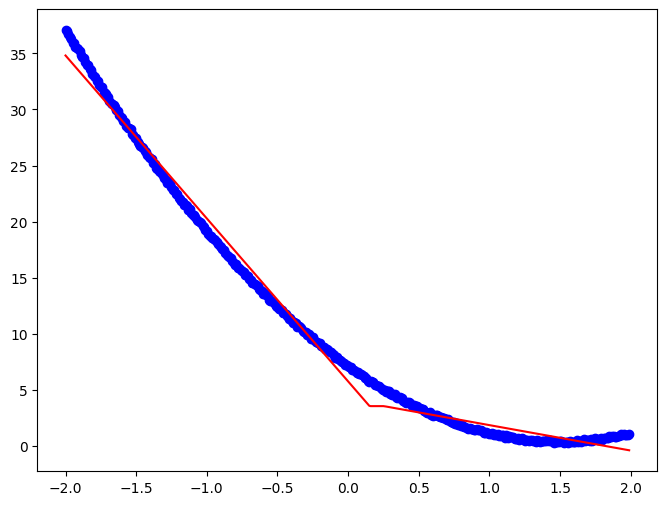

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='blue')
plt.plot(x, yl, c='red')

In [89]:
import torch.nn as nn

In [97]:
lm = nn.Linear(1, 1)

In [131]:
for n,v in lm.named_parameters():
    print(n)
    print(v)

weight
Parameter containing:
tensor([[0.6054]], requires_grad=True)
bias
Parameter containing:
tensor([-0.9305], requires_grad=True)


In [99]:
type(v)

torch.nn.parameter.Parameter

In [100]:
i = torch.tensor(1)

In [102]:
i.shape

torch.Size([])

In [103]:
lm(i)

RuntimeError: both arguments to matmul need to be at least 1D, but they are 0D and 2D

In [135]:
i = torch.tensor([1.0,])

In [134]:
import torch

In [109]:
lm(i)

tensor([-0.3251], grad_fn=<AddBackward0>)

In [116]:
i2 = torch.tensor([[1.0,],[2.0,]])

In [120]:
i2.shape

torch.Size([2, 1])

In [121]:
lm(i2)

tensor([[-0.3251],
        [ 0.2803]], grad_fn=<AddmmBackward0>)

In [122]:
i2

tensor([[1.],
        [2.]])

In [124]:
t = torch.ones(10)

In [125]:
t

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [126]:
t.unsqueeze(1)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [127]:
t

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [128]:
t.unsqueeze(0)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [129]:
t.unsqueeze(2)

IndexError: Dimension out of range (expected to be in range of [-2, 1], but got 2)

In [130]:
list(lm.parameters())

[Parameter containing:
 tensor([[0.6054]], requires_grad=True),
 Parameter containing:
 tensor([-0.9305], requires_grad=True)]

In [137]:
lm(i)

tensor([-0.3251], grad_fn=<AddBackward0>)

In [157]:
lm2 = nn.Linear(3, 2)

In [159]:
for n, i in lm2.named_parameters():
    print(n, i, '\n')

weight Parameter containing:
tensor([[ 0.1788,  0.1602,  0.0969],
        [-0.0032, -0.3607, -0.5063]], requires_grad=True) 

bias Parameter containing:
tensor([-0.4407, -0.4637], requires_grad=True) 



In [160]:
t = torch.tensor([1.2, 2.1, 3.1])

In [161]:
lm2(t)

tensor([ 0.4106, -2.7944], grad_fn=<AddBackward0>)

In [154]:
t

tensor([[1.2000, 2.1000, 3.1000]])

In [163]:
r = nn.ReLU()

In [164]:
r(t)

tensor([1.2000, 2.1000, 3.1000])

In [167]:
t = torch.tensor([-1.0,2.0,-0.5,0.1])

In [168]:
r(t)

tensor([0.0000, 2.0000, 0.0000, 0.1000])

In [169]:
model = nn.Sequential(
    nn.Linear(1, 3),
    nn.ReLU(),
    nn.Linear(3, 1))

In [173]:
for n, i in model.named_parameters():
    print(n)
    print(i)
    print()

0.weight
Parameter containing:
tensor([[-0.7849],
        [ 0.4613],
        [ 0.0009]], requires_grad=True)

0.bias
Parameter containing:
tensor([ 0.5611, -0.4956,  0.8715], requires_grad=True)

2.weight
Parameter containing:
tensor([[ 0.0201, -0.2412,  0.2868]], requires_grad=True)

2.bias
Parameter containing:
tensor([-0.0255], requires_grad=True)



In [176]:
x = torch.tensor([2.0])

In [177]:
y = model(x)

In [178]:
y

tensor([0.1219], grad_fn=<AddBackward0>)

In [191]:
x

[-2.0,
 -1.99,
 -1.98,
 -1.97,
 -1.96,
 -1.95,
 -1.94,
 -1.93,
 -1.92,
 -1.91,
 -1.9,
 -1.89,
 -1.88,
 -1.87,
 -1.8599999999999999,
 -1.85,
 -1.84,
 -1.83,
 -1.82,
 -1.81,
 -1.8,
 -1.79,
 -1.78,
 -1.77,
 -1.76,
 -1.75,
 -1.74,
 -1.73,
 -1.72,
 -1.71,
 -1.7,
 -1.69,
 -1.68,
 -1.67,
 -1.66,
 -1.65,
 -1.6400000000000001,
 -1.63,
 -1.62,
 -1.6099999999999999,
 -1.6,
 -1.5899999999999999,
 -1.58,
 -1.57,
 -1.56,
 -1.55,
 -1.54,
 -1.53,
 -1.52,
 -1.51,
 -1.5,
 -1.49,
 -1.48,
 -1.47,
 -1.46,
 -1.45,
 -1.44,
 -1.43,
 -1.42,
 -1.4100000000000001,
 -1.4,
 -1.3900000000000001,
 -1.38,
 -1.37,
 -1.3599999999999999,
 -1.35,
 -1.3399999999999999,
 -1.33,
 -1.3199999999999998,
 -1.31,
 -1.2999999999999998,
 -1.29,
 -1.28,
 -1.27,
 -1.26,
 -1.25,
 -1.24,
 -1.23,
 -1.22,
 -1.21,
 -1.2,
 -1.19,
 -1.18,
 -1.17,
 -1.1600000000000001,
 -1.15,
 -1.1400000000000001,
 -1.13,
 -1.12,
 -1.1099999999999999,
 -1.1,
 -1.0899999999999999,
 -1.08,
 -1.0699999999999998,
 -1.06,
 -1.0499999999999998,
 -1.04,
 -1.03,
 

In [187]:
xt = torch.tensor([x,]).T

In [188]:
xt.shape

torch.Size([400, 1])

In [192]:
xt

tensor([[-2.0000],
        [-1.9900],
        [-1.9800],
        [-1.9700],
        [-1.9600],
        [-1.9500],
        [-1.9400],
        [-1.9300],
        [-1.9200],
        [-1.9100],
        [-1.9000],
        [-1.8900],
        [-1.8800],
        [-1.8700],
        [-1.8600],
        [-1.8500],
        [-1.8400],
        [-1.8300],
        [-1.8200],
        [-1.8100],
        [-1.8000],
        [-1.7900],
        [-1.7800],
        [-1.7700],
        [-1.7600],
        [-1.7500],
        [-1.7400],
        [-1.7300],
        [-1.7200],
        [-1.7100],
        [-1.7000],
        [-1.6900],
        [-1.6800],
        [-1.6700],
        [-1.6600],
        [-1.6500],
        [-1.6400],
        [-1.6300],
        [-1.6200],
        [-1.6100],
        [-1.6000],
        [-1.5900],
        [-1.5800],
        [-1.5700],
        [-1.5600],
        [-1.5500],
        [-1.5400],
        [-1.5300],
        [-1.5200],
        [-1.5100],
        [-1.5000],
        [-1.4900],
        [-1.

In [193]:
yt = model(xt)

In [194]:
yt

tensor([[0.2667],
        [0.2665],
        [0.2664],
        [0.2662],
        [0.2661],
        [0.2659],
        [0.2658],
        [0.2656],
        [0.2655],
        [0.2653],
        [0.2652],
        [0.2650],
        [0.2648],
        [0.2647],
        [0.2645],
        [0.2644],
        [0.2642],
        [0.2641],
        [0.2639],
        [0.2638],
        [0.2636],
        [0.2634],
        [0.2633],
        [0.2631],
        [0.2630],
        [0.2628],
        [0.2627],
        [0.2625],
        [0.2624],
        [0.2622],
        [0.2620],
        [0.2619],
        [0.2617],
        [0.2616],
        [0.2614],
        [0.2613],
        [0.2611],
        [0.2610],
        [0.2608],
        [0.2607],
        [0.2605],
        [0.2603],
        [0.2602],
        [0.2600],
        [0.2599],
        [0.2597],
        [0.2596],
        [0.2594],
        [0.2593],
        [0.2591],
        [0.2589],
        [0.2588],
        [0.2586],
        [0.2585],
        [0.2583],
        [0

In [195]:
loss(xt, yt)

tensor(1.4596, grad_fn=<MseLossBackward0>)